In [1]:
!wget -c http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2023-10-08 20:08:35--  http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.248.182, 52.217.16.78, 52.217.230.8, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.248.182|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  64.5MB/s    in 9.1s    

2023-10-08 20:08:45 (60.7 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [2]:
import numpy as np
import random
import os
import matplotlib

In [3]:
from tensorflow.keras import layers
image_in = layers.Input(shape=(150,150,3))

In [4]:
x = layers.Conv2D(16, 3, activation='relu')(image_in)
x = layers.MaxPooling2D(2)(x)

In [5]:
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [6]:
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [7]:
x = layers.Flatten()(x)
x = layers.Dense(512,activation='relu')(x)

In [8]:
output = layers.Dense(1,activation='sigmoid')(x)

In [9]:
from tensorflow.keras.models import Model
my_model= Model(image_in,output)

In [10]:
from tensorflow.keras.optimizers import RMSprop
my_model.compile(loss='binary_crossentropy',optimizer=RMSprop(0.0001),metrics=['acc'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_data = ImageDataGenerator(rescale=1./255)

In [12]:
import os
import zipfile
import requests
from tensorflow.keras.preprocessing.image import ImageDataGenerator

url = "http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip"


response = requests.get(url)


with open('Cat_Dog_data.zip', 'wb') as file:
    file.write(response.content)


with zipfile.ZipFile('Cat_Dog_data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

train_dir = 'data/Cat_Dog_data/train'

training_dataset = training_data.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 22500 images belonging to 2 classes.


In [13]:

testing_dir = 'data/Cat_Dog_data/test'

validation_dataset = training_data.flow_from_directory(testing_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2500 images belonging to 2 classes.


In [14]:
H = my_model.fit_generator(training_dataset, steps_per_epoch=100, epochs=50,validation_data=validation_dataset, validation_steps=50, verbose=2)

Epoch 1/50


<ipython-input-14-7e62b95fac2d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = my_model.fit_generator(training_dataset, steps_per_epoch=100, epochs=50,validation_data=validation_dataset, validation_steps=50, verbose=2)


100/100 - 63s - loss: 0.6909 - acc: 0.5400 - val_loss: 0.6804 - val_acc: 0.5500 - 63s/epoch - 625ms/step
Epoch 2/50
100/100 - 61s - loss: 0.6702 - acc: 0.5900 - val_loss: 0.6662 - val_acc: 0.6000 - 61s/epoch - 609ms/step
Epoch 3/50
100/100 - 61s - loss: 0.6631 - acc: 0.5950 - val_loss: 0.6501 - val_acc: 0.6250 - 61s/epoch - 613ms/step
Epoch 4/50
100/100 - 62s - loss: 0.6458 - acc: 0.6225 - val_loss: 0.6346 - val_acc: 0.6260 - 62s/epoch - 624ms/step
Epoch 5/50
100/100 - 61s - loss: 0.6300 - acc: 0.6340 - val_loss: 0.6255 - val_acc: 0.6450 - 61s/epoch - 613ms/step
Epoch 6/50
100/100 - 69s - loss: 0.6213 - acc: 0.6535 - val_loss: 0.6072 - val_acc: 0.6730 - 69s/epoch - 690ms/step
Epoch 7/50
100/100 - 62s - loss: 0.6048 - acc: 0.6755 - val_loss: 0.5944 - val_acc: 0.6770 - 62s/epoch - 623ms/step
Epoch 8/50
100/100 - 63s - loss: 0.5915 - acc: 0.6940 - val_loss: 0.5941 - val_acc: 0.6790 - 63s/epoch - 634ms/step
Epoch 9/50
100/100 - 61s - loss: 0.5804 - acc: 0.6970 - val_loss: 0.5854 - val_acc:

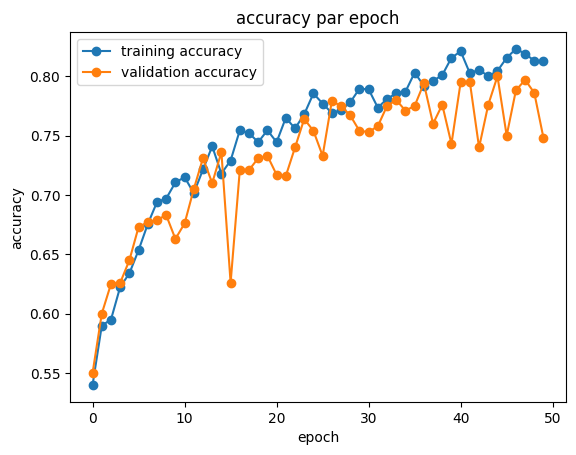

In [15]:
import matplotlib.pyplot as plt


plt.plot(H.history['acc'], label='training accuracy', marker='o')
plt.plot(H.history['val_acc'], label='validation accuracy', marker='o')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy par epoch')
plt.legend()

plt.show()


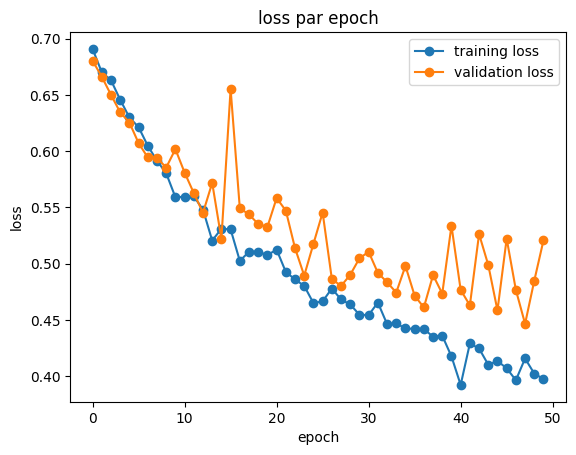

In [16]:
plt.plot(H.history['loss'], label='training loss', marker='o')
plt.plot(H.history['val_loss'], label='validation loss', marker='o')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss par epoch')
plt.legend()

plt.show()


In [17]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.5).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)
print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 18s 145ms/step
Nombre de chats : [1509]Nombre de chiens : [991]


In [18]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.8).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)
print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 20s 157ms/step
Nombre de chats : [1978]Nombre de chiens : [522]
